### MNIST

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [15]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [16]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


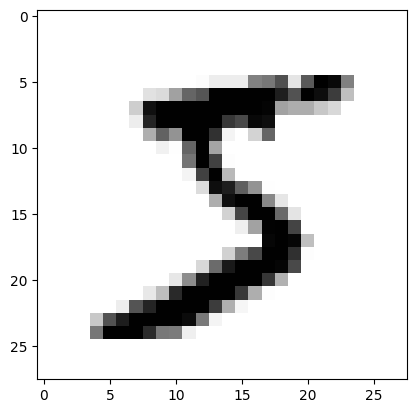

In [18]:
digit = X[0] # to_numpy[0] permite convertir a array de numpy la fila 0
digit_image = digit.reshape(28, 28)
# mostrar la imagen
plt.imshow(digit_image, cmap='binary') # imshow muestra la imagen
plt.show()

In [19]:
# para confirmar que es un 5
y = y.astype(np.uint8) # convertir a entero
y[0]

np.uint8(5)

In [21]:
# dividiendo el conjunyo de datos para el entrenamiento
X_train, Xtest, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
# entrenando un clasificador binario
y_train_5 = (y_train == 5) # vector booleanoyY_test_5 = (y_test == 5)

In [23]:
# algoritmo de SGDClassifier
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [24]:
sgd_classifier.predict([X[0]])

array([ True])

### RENDIMIENTO DEL MODELO

In [25]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_classifier, X_train, y_train_5, cv=3, scoring='accuracy')


array([0.95035, 0.96035, 0.9604 ])

## MATRIZ DE CONFUSIÓN

## | TN | FP |
## | FN | TP | 

### TN = TrueNegative. valores que el algoritmo dijo que no eran el numero y estaba en lo correcto

### FP = FalsePositive. valores que el algoritmo dijo que eran el numero y se equivocó

### FN = FalseNegative. valores que el algoritmo dijo que NO eran el numero y se equivocó

### TP = TruePositive. valores que el algoritmo dijo que eran el numero y estaba en lo correcto

In [26]:
# Predicciones
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_classifier, X_train, y_train_5, cv=3)

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


array([[53892,   687],
       [ 1891,  3530]])

In [31]:
 
# PRECISIÓN.### TP / (TP + FP)
precision = 53892 / (53892 + 687)

# RECALL (SENSIBILIDAD)### TP / (TP + FN)
recall = 53892 / (53892 + 1891)

print(f'precision: {precision}\n recall: {recall}')

from sklearn.metrics import precision_score, recall_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))



precision: 0.987412741164184
 recall: 0.9661007833927899
0.8370879772350012
0.6511713705958311


In [32]:
# F1 score permite tener una métrica que combine precisión y recall
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7325171197343847

### REGRESIÓN LOGÍSTICA

In [63]:
# set de datos
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\ander\Escritorio\PYTHON\Python 2025\machine_learning\datasets\Salary_Data.csv',sep=',', encoding='utf-8')
print(df.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [64]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [65]:
# reemplazar valores nulor por la media
numeric_col = df.select_dtypes(include=['int64', 'float64']).columns
df_clean = df.copy()
df_clean[numeric_col] = df_clean[numeric_col].fillna(df_clean[numeric_col].mean())
print("Valores nulos después del reemplazo:", df_clean.isnull().sum())

Valores nulos después del reemplazo: Age                    0
Gender                 2
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


In [66]:
# reemplazar valores nulos de gender por la moda
moda_gender = df_clean['Gender'].mode()[0]
df_clean['Gender'] = df_clean['Gender'].fillna(moda_gender)
print("Valores nulos después del reemplazo:", df_clean.isnull().sum())


Valores nulos después del reemplazo: Age                    0
Gender                 0
Education Level        2
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64


In [67]:
# reemplazar valores nulos de gender por la moda
moda_job_title = df_clean['Job Title'].mode()[0]
df_clean['Job Title'] = df_clean['Job Title'].fillna(moda_job_title)
print("Valores nulos después del reemplazo:", df_clean.isnull().sum())


Valores nulos después del reemplazo: Age                    0
Gender                 0
Education Level        2
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [68]:
# reemplazar valores nulos de gender por la moda
moda_ed_level = df_clean['Education Level'].mode()[0]
df_clean['Education Level'] = df_clean['Education Level'].fillna(moda_ed_level)
print("Valores nulos después del reemplazo:", df_clean.isnull().sum())


Valores nulos después del reemplazo: Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64


In [69]:
print(df_clean.head())

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [70]:
 # variables numericas
X = df_clean[['Years of Experience', 'Age']]
y = df_clean.iloc[:, -1].values

In [ ]:
# variable categorica
gender = df_clean[['Gender']]
# transformando a columna númerica
from sklearn.preprocessing import OneHotEncoder
# instanciando
cat_encoded = OneHotEncoder()
# transformando la variable categorica
df_cat_onehot = cat_encoded.fit_transform(gender) 

In [60]:
cat_encoded.categories_

[array(['Female', 'Male'], dtype=object)]

In [62]:
# Valores asignados
df_cat_onehot.toarray()[:3]

array([[0., 1.],
       [1., 0.],
       [0., 1.]])

In [73]:
# transformar a Dataframe
encode_df = pd.DataFrame(
        df_cat_onehot.toarray(), 
        columns = cat_encoded.get_feature_names_out()
    )
encode_df.head()

,Gender_Female,Gender_Male
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [ ]:
# unir variables indendientes con varible categorica transformada a num
data_X = pd.concat([X, encode_df], axis=1)
data_X.head()

,Years of Experience,Age,Gender_Female,Gender_Male
0,5.0,32.0,0.0,1.0
1,3.0,28.0,1.0,0.0
2,15.0,45.0,0.0,1.0
3,7.0,36.0,1.0,0.0
4,20.0,52.0,0.0,1.0


In [ ]:
# tamaño del conjunto
data_X.shape

(375, 4)

In [ ]:
# Entrenamiento y testing
